# 学習アルゴリズムの実装
### 前提
ニューラルネットワークには適応可能な重みとバイアスがあり、この重みとバイアスを訓練データに適応するように調整することを「学習」と呼ぶ。

### ニューラルネットワークの学習手順
1. ミニバッチ
    - 訓練データの中からランダムに一部のデータを選び出す。ミニバッチの損失関数の値を減らすことを目的とする。

2. 勾配の算出
    -  ミニバッチの損失関数を減らすために、各重みパラメータの勾配を求める。

3. パラメータ更新
    - 重みパラメータを購買方向に微小量だけ更新する。

4. 繰り返す
    - ステップ1-4を繰り返す。
    
    
## 確率的勾配降下法 (stochastic gradient descent)
- 無作為に選びだしたデータに対して行う勾配降下法
- 頭文字を取ってSGDという関数で実装されるのが一般的

In [60]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [61]:
# TwoLayerNetクラスのparams変数には重みパラメータが格納されている
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # 第1層の重みパラメータ

(784, 100)

In [62]:
net.params['b1'].shape # 第1層のバイアス

(100,)

In [63]:
net.params['W2'].shape # 第2層の重みパラメータ

(100, 10)

In [64]:
net.params['b2'].shape # 第2層のバイアス

(10,)

In [65]:
# 推論処理
x = np.random.rand(100, 784)
print(x)

[[ 0.88416586  0.43317604  0.17315907 ...,  0.0204979   0.60599346
   0.80655558]
 [ 0.81258679  0.35863765  0.40018272 ...,  0.27014564  0.83040961
   0.55578968]
 [ 0.17308079  0.46081134  0.28882595 ...,  0.62600214  0.11213502
   0.36088522]
 ..., 
 [ 0.84320044  0.2808934   0.5724867  ...,  0.34903206  0.83875859
   0.89610921]
 [ 0.93496794  0.63916696  0.98078704 ...,  0.14576107  0.06079858
   0.31137782]
 [ 0.22637059  0.66423935  0.6243067  ...,  0.48180624  0.40782164
   0.95295534]]


In [66]:
y = net.predict(x)
print(y)

[[ 0.09885399  0.10253759  0.09853001  0.09847433  0.09831149  0.0927827
   0.10212358  0.10455421  0.1006841   0.103148  ]
 [ 0.09905465  0.10281834  0.09858039  0.09847664  0.09837118  0.0930147
   0.10234927  0.10416234  0.10057981  0.10259267]
 [ 0.09940438  0.10290949  0.09870082  0.09858117  0.09800426  0.09278136
   0.10190214  0.10445149  0.1002313   0.10303358]
 [ 0.09928012  0.10230866  0.09822677  0.09859649  0.09860263  0.09271114
   0.10218546  0.10425721  0.10076148  0.10307003]
 [ 0.09930721  0.10278338  0.09834168  0.09875446  0.09807379  0.0929773
   0.10199631  0.10411022  0.10035538  0.10330026]
 [ 0.09904766  0.10270835  0.09852186  0.09830919  0.09816105  0.09308529
   0.10199604  0.10457501  0.1006091   0.10298646]
 [ 0.0991239   0.10262854  0.09848696  0.09866085  0.09836037  0.09287753
   0.10207097  0.10422179  0.1004621   0.10310699]
 [ 0.09948298  0.10301785  0.09851107  0.09853566  0.09837035  0.09301391
   0.10153279  0.10415206  0.10078699  0.10259632]
 [ 

In [67]:
# grads変数にはparams変数と対応するように各パラメータの勾配が格納される
x = np.random.rand(100, 784) # 入力画像サイズが28×28の計784個
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t) # 勾配を計算

grads['W1'].shape  # (784, 100)
grads['b1'].shape  # (100,)
grads['W2'].shape  # (100, 10)
grads['b2'].shape  # (10,)

(10,)

# ミニバッチ学習の実装
- ミニバッチ学習とは訓練データから無作為に一部のデータを取り出して-- これをミニバッチという -- そのミニバッチを対象に、勾配法によりパラメータを更新するもの。

# テストデータで評価
### ニューラルネットワークの学習では、訓練データ以外のデータを正しく認識できるかどうかを確認する必要があります。これは「過学習」を起こしていないかの確認
- 過学習を起こすとは、例えば訓練データだけを正しく認識でき、訓練データに含まれないものは識別できないこと。

train acc, test acc | 0.112433333333, 0.1135
train acc, test acc | 0.79055, 0.7961
train acc, test acc | 0.876566666667, 0.8805
train acc, test acc | 0.8984, 0.9017
train acc, test acc | 0.908766666667, 0.9126
train acc, test acc | 0.914316666667, 0.9165
train acc, test acc | 0.9208, 0.9193
train acc, test acc | 0.925, 0.9242
train acc, test acc | 0.9282, 0.9277
train acc, test acc | 0.931283333333, 0.9321
train acc, test acc | 0.934383333333, 0.9342
train acc, test acc | 0.93645, 0.9371
train acc, test acc | 0.939, 0.9384
train acc, test acc | 0.940816666667, 0.9411
train acc, test acc | 0.94275, 0.9432
train acc, test acc | 0.94525, 0.9449
train acc, test acc | 0.946, 0.9446


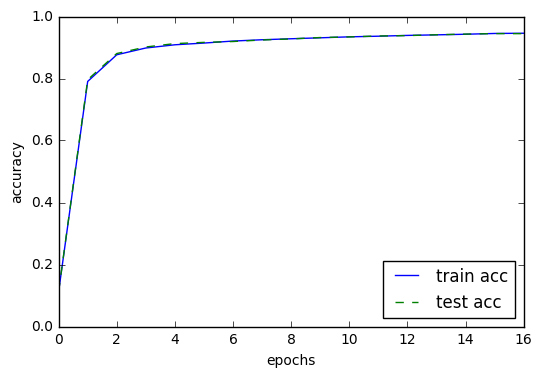

In [70]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## ↑のグラフ
- 実線:訓練データの認識精度
- 破線:テストデータの認識精度

2つに差がないことから過学習は起こっていないことが分かる。